In [ ]:
import myanfis
import pandas as pd
import numpy as np
import warnings
import sys
import seaborn as sns
import matplotlib.pyplot as plt
sys.maxsize
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import tensorflow as tf
import random

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
columns = pd.read_csv('/content/gdrive/MyDrive/sepsis/1.csv').columns
columns

Index(['heart_rate', 'bp_systolic', 'bp_diastolic', 'map', 'resp', 'temp',
       'spo2', 'fio2', 'wbc', 'bun', 'bilirubin', 'creatinine', 'lactate',
       'platelets', 'ph', 'pco2', 'po2', 'bicarbonate', 'hemoglobin',
       'hematocrit', 'potassium', 'chloride', 'gcs', 'age', 'sirs', 'qsofa',
       'sepsis_icd'],
      dtype='object')

In [ ]:
#get random patients from data file
randomlist_sepsis = []
randomlist_nosepsis = []
for i in range(0,300):
    n  = random.randint(1,1000)
    randomlist_sepsis.append(n)
    n = random.randint(1,1000)
    randomlist_nosepsis.append(n)

In [ ]:
data = np.zeros((600,27))
warnings.filterwarnings('ignore')
count=0
for i in randomlist_nosepsis:
    file_path = '/content/gdrive/MyDrive/no_sepsis/' + str(i) + '.csv'
    nosepsis_data = pd.read_csv(file_path)
    mean_data = np.nanmean(nosepsis_data, axis=0)
    data[count]=mean_data
    count+=1
    

for i in randomlist_sepsis:
    file_path = '/content/gdrive/MyDrive/sepsis/' + str(i) + '.csv'
    sepsis_data = pd.read_csv(file_path)
    mean_data = np.nanmean(sepsis_data, axis=0)
    data[count]= mean_data
    count+=1

df = pd.DataFrame(data=data, columns=columns)
df

,heart_rate,bp_systolic,bp_diastolic,map,resp,temp,spo2,fio2,wbc,bun,...,bicarbonate,hemoglobin,hematocrit,potassium,chloride,gcs,age,sirs,qsofa,sepsis_icd
0,101.166667,121.541667,71.250000,82.375000,18.166667,37.647222,98.333333,NaN,11.973913,15.391304,...,24.782609,11.513043,32.060870,3.891304,100.000000,15.000000,35.21,0.666667,0.000000,0.0
1,85.000000,116.666667,56.142857,79.000000,15.227273,37.147619,97.380952,NaN,16.100000,9.000000,...,22.000000,10.204762,28.666667,4.526087,104.000000,12.238095,82.66,0.043478,0.043478,0.0
2,67.125000,137.625000,47.583333,76.680554,16.541667,37.317460,98.791667,NaN,6.400000,18.000000,...,26.363636,12.100000,34.400000,3.936364,107.636364,8.086957,85.65,0.000000,0.250000,0.0
3,82.958333,117.458333,61.416667,82.430566,18.166667,37.675927,97.166667,NaN,12.558824,25.352941,...,20.058824,11.247059,32.663158,3.905882,112.000000,8.750000,64.16,0.333333,0.541667,0.0
4,100.541667,153.875000,70.916667,91.125000,21.041667,36.822751,97.833333,NaN,5.000000,30.000000,...,30.000000,11.300000,34.300000,5.500000,100.000000,13.809524,61.73,0.416667,0.041667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,119.565217,100.652174,57.826087,67.565217,25.173913,36.562802,94.478261,50.0,2.690476,41.333333,...,19.047619,11.342857,33.766667,5.295238,101.476190,14.826087,34.01,1.000000,0.391304,1.0
596,121.125000,100.708333,52.458333,NaN,33.125000,38.155092,97.375000,NaN,20.000000,52.900000,...,19.700000,8.300000,26.300000,3.560000,125.700000,10.000000,59.03,1.000000,1.000000,1.0
597,86.136364,98.090909,50.136364,61.590909,22.590909,32.750000,96.272727,NaN,10.242857,19.000000,...,22.000000,10.585714,31.052381,3.400000,105.000000,14.285714,86.83,0.136364,0.681818,1.0
598,103.333333,124.500000,76.458333,87.458333,33.875000,36.300926,96.958333,NaN,21.700000,85.000000,...,18.000000,11.100000,34.900000,6.600000,95.000000,14.541667,50.05,1.000000,0.541667,1.0


In [ ]:
minMaxScaler = MinMaxScaler()
df_ =df.copy()

col = ['creatinine','bilirubin','heart_rate','wbc','resp','lactate','sepsis_icd']

df_[col]

,creatinine,bilirubin,heart_rate,wbc,resp,lactate,sepsis_icd
0,0.869565,1.491304,101.166667,11.973913,18.166667,NaN,0.0
1,0.500000,NaN,85.000000,16.100000,15.227273,NaN,0.0
2,0.545455,NaN,67.125000,6.400000,16.541667,NaN,0.0
3,1.447059,NaN,82.958333,12.558824,18.166667,1.500000,0.0
4,5.500000,NaN,100.541667,5.000000,21.041667,NaN,0.0
...,...,...,...,...,...,...,...
595,2.628571,0.700000,119.565217,2.690476,25.173913,1.900000,1.0
596,1.460000,0.400000,121.125000,20.000000,33.125000,NaN,1.0
597,0.700000,NaN,86.136364,10.242857,22.590909,1.300000,1.0
598,10.900000,NaN,103.333333,21.700000,33.875000,1.200000,1.0


In [ ]:
#scaling data
df_[col] = minMaxScaler.fit_transform(df[col])

#shuffleing data
df_ = df_[col].sample(frac = 1)

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 213 to 27
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   creatinine  600 non-null    float64
 1   bilirubin   294 non-null    float64
 2   heart_rate  600 non-null    float64
 3   wbc         600 non-null    float64
 4   resp        600 non-null    float64
 5   lactate     358 non-null    float64
 6   sepsis_icd  600 non-null    float64
dtypes: float64(7)
memory usage: 37.5 KB


In [ ]:
#filling null values in lactate
mean_value= np.nanmean(df_['lactate'])
df_['lactate'] = df_['lactate'].fillna(mean_value)

#filling null values in bilirubin
mean_value= np.nanmean(df_['bilirubin'])
df_['bilirubin'] = df_['bilirubin'].fillna(mean_value)

In [ ]:
df_.corr()

,creatinine,bilirubin,heart_rate,wbc,resp,lactate,sepsis_icd
creatinine,1.000000,0.005767,-0.028699,0.018152,0.036774,0.093746,0.137503
bilirubin,0.005767,1.000000,-0.037177,0.013660,-0.002960,0.092028,0.076559
heart_rate,-0.028699,-0.037177,1.000000,0.093293,0.375252,0.137406,0.237938
wbc,0.018152,0.013660,0.093293,1.000000,0.182967,-0.051357,0.111847
resp,0.036774,-0.002960,0.375252,0.182967,1.000000,0.033415,0.346123
lactate,0.093746,0.092028,0.137406,-0.051357,0.033415,1.000000,0.072466
sepsis_icd,0.137503,0.076559,0.237938,0.111847,0.346123,0.072466,1.000000


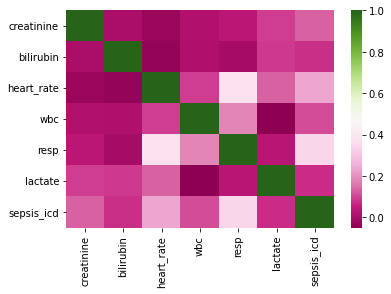

In [ ]:
sns.heatmap(df_.corr(), cmap="PiYG")

In [ ]:
X = df_.iloc[:,:6]
Y = df_['sepsis_icd']

x = df_.iloc[:,:6]
y = df_['sepsis_icd']

In [ ]:
#creating functions for recall, precision, f1

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
#selecting parameters for anfis
param = myanfis.fis_parameters(
    n_input=6,
    n_memb=6,
    batch_size=5,
    memb_func='gaussian',
    optimizer='adam',
    loss=tf.keras.losses.MeanAbsoluteError(),
    n_epochs=15
)

In [ ]:
kfold = KFold(n_splits=5)
histories=[]

for train_index, test_index in kfold.split(x):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    fis = myanfis.ANFIS(n_input = param.n_input,
    n_memb= param.n_memb,
    batch_size=param.batch_size,
    memb_func=param.memb_func,
    name='firstAnfis')


    fis.model.compile(optimizer=param.optimizer,
                      loss=param.loss,
                      metrics=['mae', 'accuracy', recall_m, precision_m, f1_m])
    
    
        
    history = fis.fit(X_train, Y_train,
                  epochs=param.n_epochs,
                  batch_size=param.batch_size,
                  validation_data = (X_test, Y_test),
                  )
    
    
    histories.append(history)

Epoch 1/15
96/96 [==============================] - 2s 15ms/step - loss: 0.5061 - mae: 0.5061 - accuracy: 0.4896 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.4541 - val_mae: 0.4541 - val_accuracy: 0.5417 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/15
96/96 [==============================] - 1s 11ms/step - loss: 0.4984 - mae: 0.4984 - accuracy: 0.4896 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.4477 - val_mae: 0.4477 - val_accuracy: 0.5417 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/15
96/96 [==============================] - 1s 11ms/step - loss: 0.4894 - mae: 0.4894 - accuracy: 0.4896 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.4401 - val_mae: 0.4401 - val_accuracy: 0.5417 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 4/15
96/96 [===================

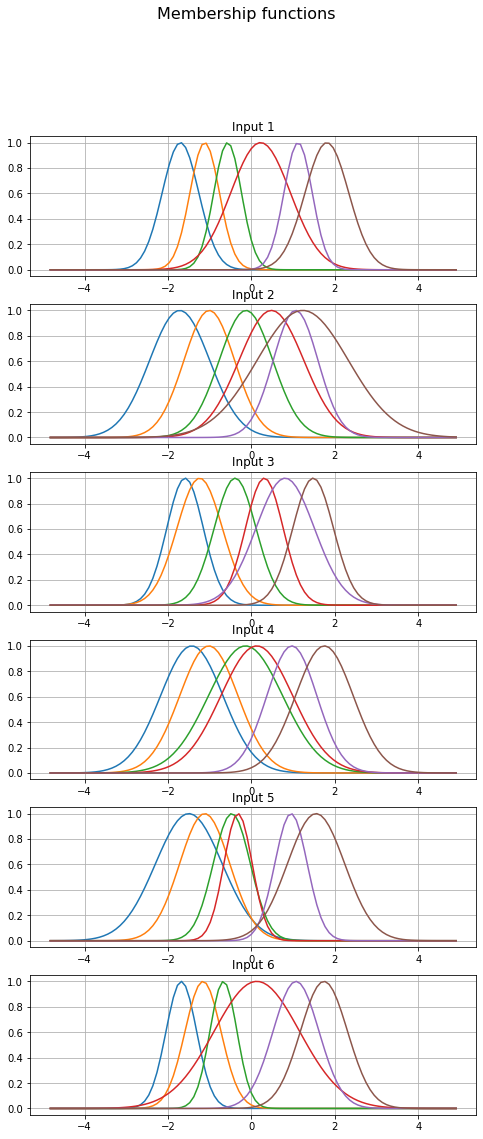

In [ ]:
fis.plotmfs()

Text(0.5, 1.0, 'Iteration 1')

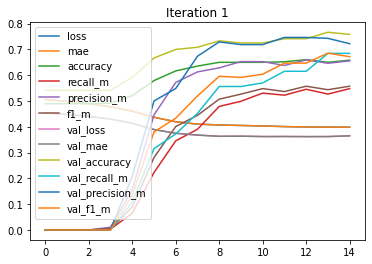

In [ ]:
pd.DataFrame(histories[0].history).plot()
plt.title("Iteration 1")

Text(0.5, 1.0, 'Iteration 2')

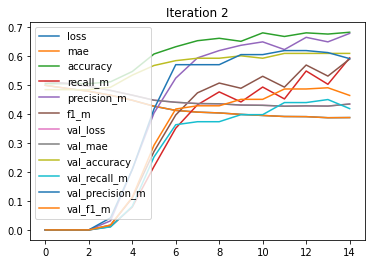

In [ ]:
pd.DataFrame(histories[1].history).plot()
plt.title("Iteration 2")

Text(0.5, 1.0, 'Iteration 3')

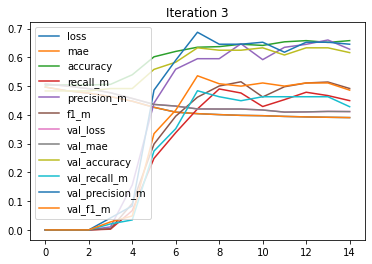

In [ ]:
pd.DataFrame(histories[2].history).plot()
plt.title("Iteration 3")

Text(0.5, 1.0, 'Iteration 4')

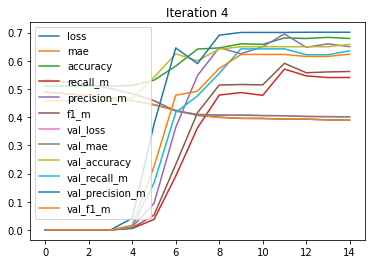

In [ ]:
pd.DataFrame(histories[3].history).plot()
plt.title("Iteration 4")

Text(0.5, 1.0, 'Iteration 5')

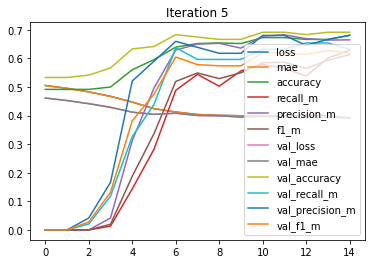

In [ ]:
pd.DataFrame(histories[4].history).plot()
plt.title("Iteration 5")

In [ ]:
print("for iteration 1")
print("----------------")
print("accuracy: ", round(np.mean(histories[0].history["accuracy"]),3))
print("recall: ",round(np.mean(histories[0].history["recall_m"]),3))
print("precision: ",round(np.mean(histories[0].history["precision_m"]),3))
print("f1: ",round(np.mean(histories[0].history["f1_m"]),3))

for iteration 1
----------------
accuracy:  0.585
recall:  0.297
precision:  0.415
f1:  0.322


In [ ]:
print("for iteration 2")
print("----------------")
print("accuracy: ", round(np.mean(histories[1].history["accuracy"]),3))
print("recall: ",round(np.mean(histories[1].history["recall_m"]),3))
print("precision: ",round(np.mean(histories[1].history["precision_m"]),3))
print("f1: ",round(np.mean(histories[1].history["f1_m"]),3))

for iteration 2
----------------
accuracy:  0.607
recall:  0.305
precision:  0.417
f1:  0.329


In [ ]:
print("for iteration 3")
print("----------------")
print("accuracy: ", round(np.mean(histories[2].history["accuracy"]),3))
print("recall: ",round(np.mean(histories[2].history["recall_m"]),3))
print("precision: ",round(np.mean(histories[2].history["precision_m"]),3))
print("f1: ",round(np.mean(histories[2].history["f1_m"]),3))

for iteration 3
----------------
accuracy:  0.591
recall:  0.264
precision:  0.386
f1:  0.292


In [ ]:
print("for iteration 4")
print("----------------")
print("accuracy: ", round(np.mean(histories[3].history["accuracy"]),3))
print("recall: ",round(np.mean(histories[3].history["recall_m"]),3))
print("precision: ",round(np.mean(histories[3].history["precision_m"]),3))
print("f1: ",round(np.mean(histories[3].history["f1_m"]),3))

for iteration 4
----------------
accuracy:  0.596
recall:  0.28
precision:  0.38
f1:  0.299


In [ ]:
print("for iteration 5")
print("----------------")
print("accuracy: ", round(np.mean(histories[4].history["accuracy"]),3))
print("recall: ",round(np.mean(histories[4].history["recall_m"]),3))
print("precision: ",round(np.mean(histories[4].history["precision_m"]),3))
print("f1: ",round(np.mean(histories[4].history["f1_m"]),3))
print("mae: ",round(np.mean(histories[3].history["mae"]),3))
print("loss: ",round(np.mean(histories[3].history["loss"]),3))

for iteration 5
----------------
accuracy:  0.606
recall:  0.363
precision:  0.452
f1:  0.376
mae:  0.427
loss:  0.427


In [ ]:
print("max accuracy for iteration 1: ",np.max(histories[0].history["accuracy"]))
print("max accuracy for iteration 2: ",np.max(histories[1].history["accuracy"]))
print("max accuracy for iteration 3: ",np.max(histories[2].history["accuracy"]))
print("max accuracy for iteration 4: ",np.max(histories[3].history["accuracy"]))
print("max accuracy for iteration 5: ",np.max(histories[4].history["accuracy"]))

max accuracy for iteration 1:  0.643750011920929
max accuracy for iteration 2:  0.6770833134651184
max accuracy for iteration 3:  0.6541666388511658
max accuracy for iteration 4:  0.6812499761581421
max accuracy for iteration 5:  0.675000011920929
